In [201]:
import pandas as pd
import numpy as np
df = pd.read_csv("./FireStatistic.csv", na_filter=True, keep_default_na=False, na_values=[''])

In [202]:
df['exintgtm'].replace(' ', np.nan, inplace=True)

In [203]:
df['exintgtm'][df['exintgtm'].isna()]

1839    NaN
9763    NaN
Name: exintgtm, dtype: object

In [204]:
df.dropna(axis=0, inplace=True, how='any')
df['exintgtm'] = df['exintgtm'].astype(int)

In [205]:
# # delete exintgtm outlier
# df = df[df['exintgtm'] >2400] * 0.7

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = (scaler.fit_transform(df[df['dmgarea'] > 1]['dmgarea'].to_numpy().reshape(-1, 1)) * 3) +1
# df['dmgarea'][df['dmgarea'] > 1] = scaled_data.ravel()

In [207]:
# 출북 -> 충북
df['ocurdo'] = df['ocurdo'].replace('출북', '충북')
df['ocurdo'] = df['ocurdo'].replace('서부', '전북')
df['ocurdo'].unique()

array(['강원', '경남', '전북', '충북', '경북', '서울', '대전', '경기', '광주', '전남', '부산',
       '인천', '충남', '울산', '대구', '세종', '제주', '전주'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10558 entries, 0 to 10559
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10558 non-null  int64  
 1   diravg      10558 non-null  object 
 2   dirmax      10558 non-null  object 
 3   dmgarea     10558 non-null  float64
 4   dmgmoney    10558 non-null  int64  
 5   exintgtm    10558 non-null  int64  
 6   extingdt    10558 non-null  int64  
 7   humidcurr   10558 non-null  float64
 8   humidmin    10558 non-null  float64
 9   humidrel    10558 non-null  float64
 10  ocurcause   10558 non-null  object 
 11  ocurdo      10558 non-null  object 
 12  ocurdt      10558 non-null  int64  
 13  ocuremd     10558 non-null  object 
 14  ocurgm      10558 non-null  object 
 15  ocurjibun   10558 non-null  object 
 16  ocurri      10558 non-null  object 
 17  ocursgg     10558 non-null  object 
 18  ocuryoil    10558 non-null  object 
 19  ownersec    10558 non-nul

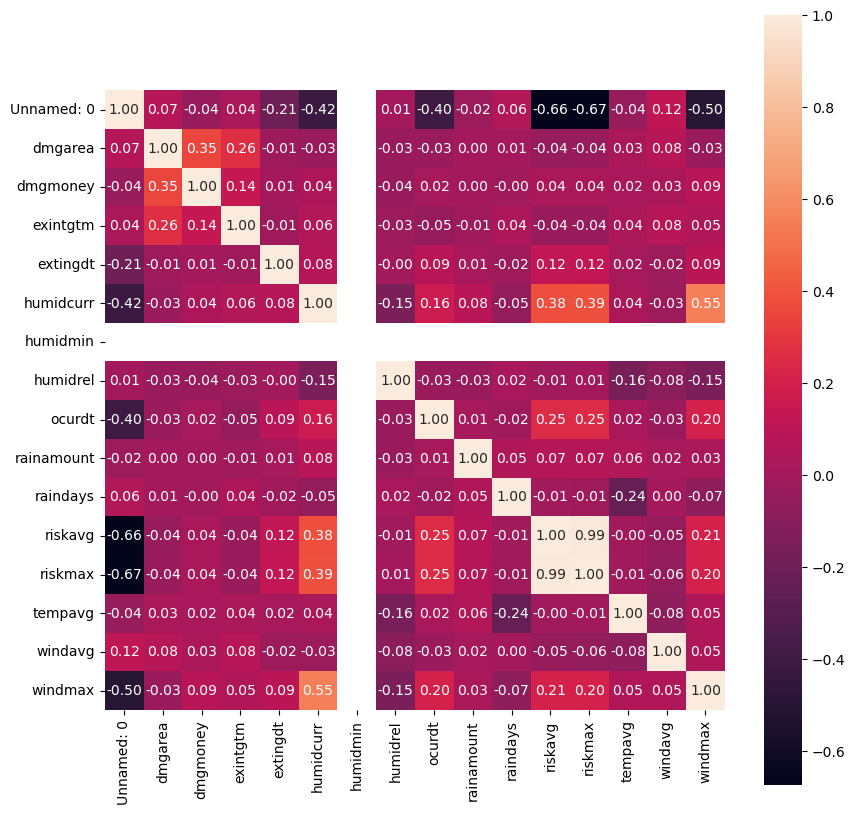

Index(['Unnamed: 0', 'diravg', 'dirmax', 'dmgarea', 'dmgmoney', 'exintgtm',
       'extingdt', 'humidcurr', 'humidmin', 'humidrel', 'ocurcause', 'ocurdo',
       'ocurdt', 'ocuremd', 'ocurgm', 'ocurjibun', 'ocurri', 'ocursgg',
       'ocuryoil', 'ownersec', 'rainamount', 'raindays', 'riskavg', 'riskmax',
       'tempavg', 'windavg', 'windmax'],
      dtype='object')


/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


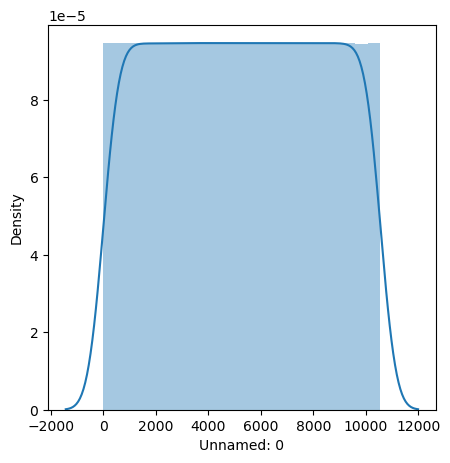

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

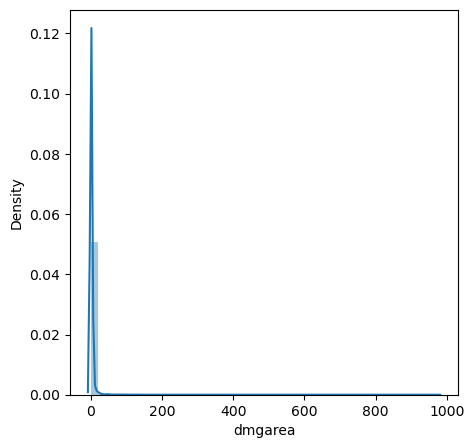

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


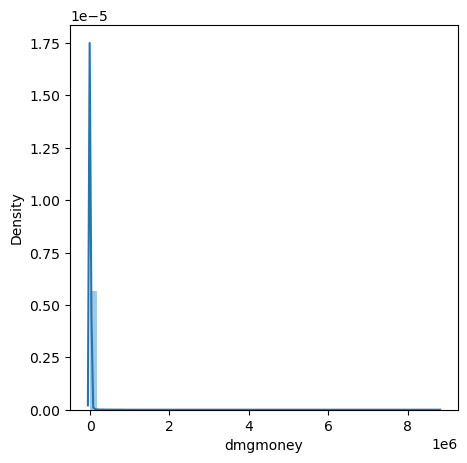

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


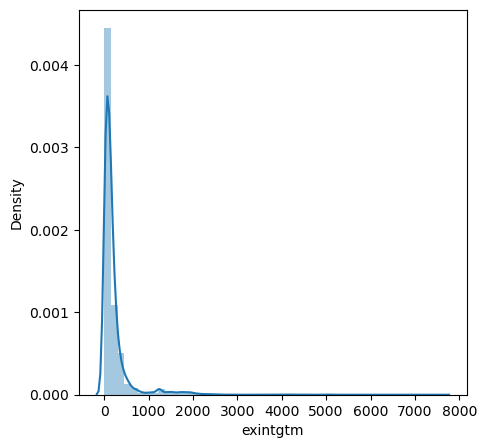

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


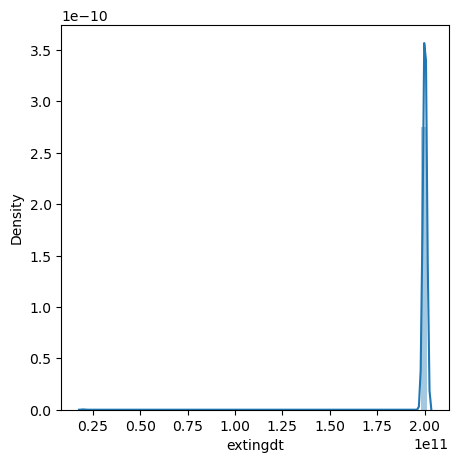

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


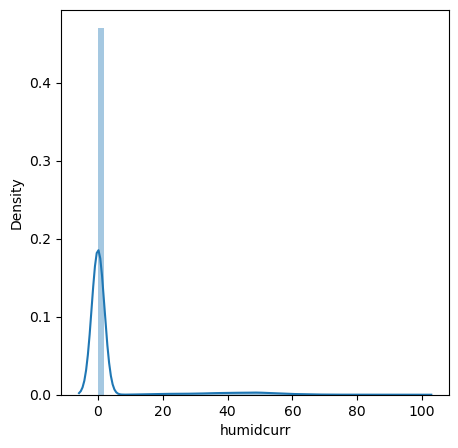

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


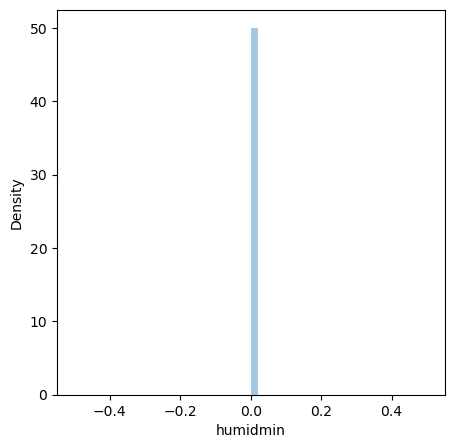

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


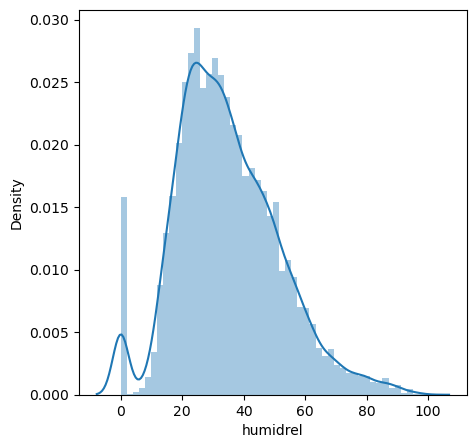

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

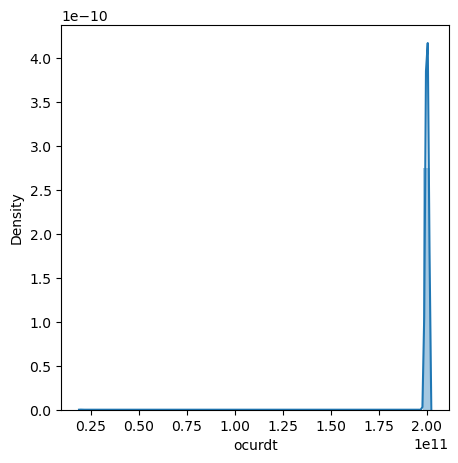

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

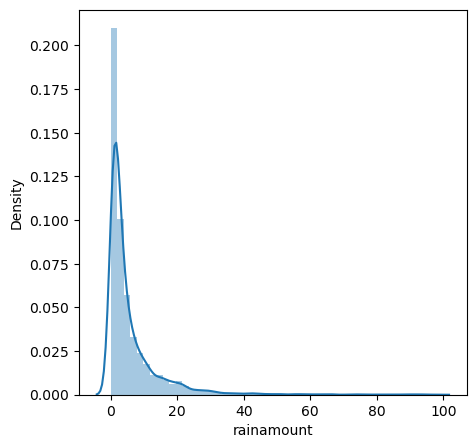

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


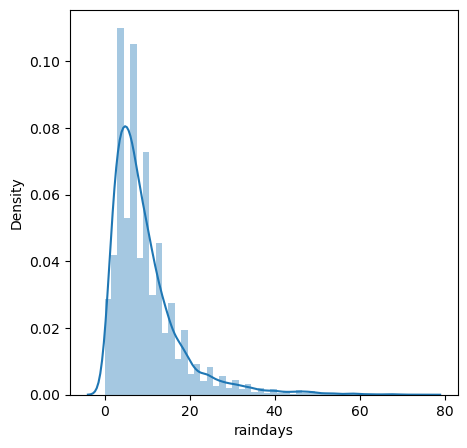

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


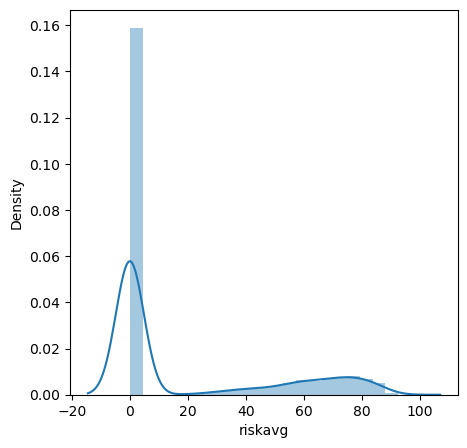

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


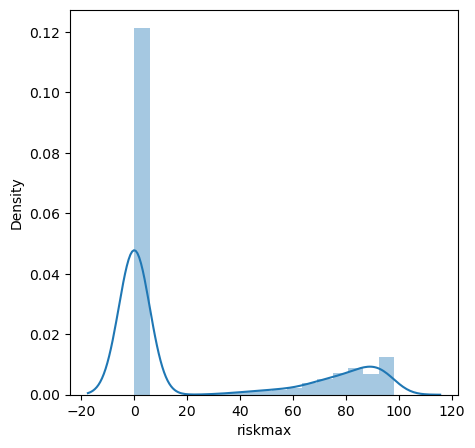

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


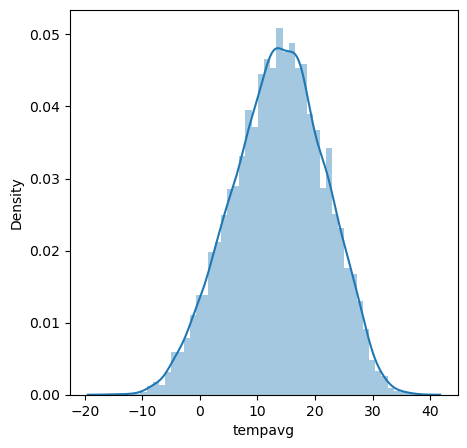

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


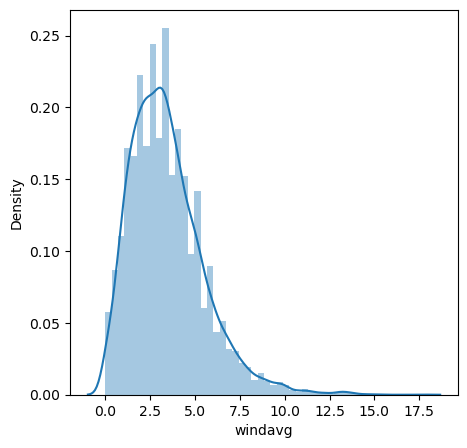

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


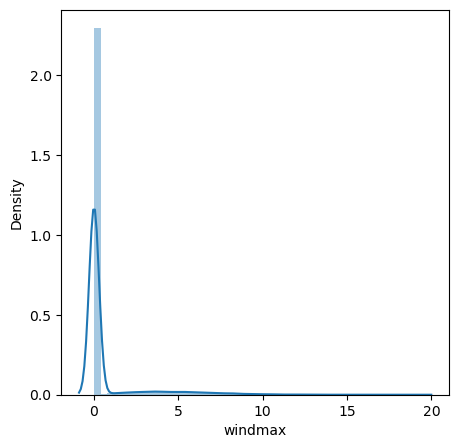

In [208]:
print(df.info())
print(df.head())
print(df.describe())
print(df.isna().sum())

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)
plt.show()

print(df.columns)
# ['diravg', 'dirmax', 'humidcurr', 'humidmin', 'humidrel', 'ocurcause',
#       'rainamount', 'raindays', 'riskavg', 'riskmax', 'tempavg', 'windavg',
#       'windmax', 'within_5km', 'within_10km', 'within_30km', 'height',
#       'scale_damage']

# columns distribution

for col in df.columns:
    try:
        plt.figure(figsize=(5, 5))
        sns.distplot(df[col])
        plt.show()
    except:
        plt.clf()

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


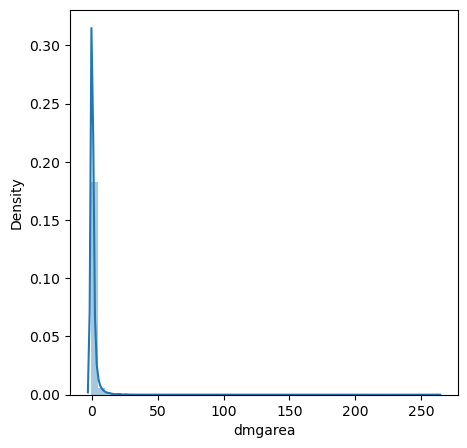

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


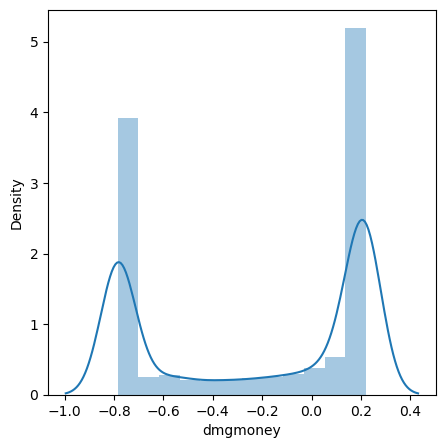

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


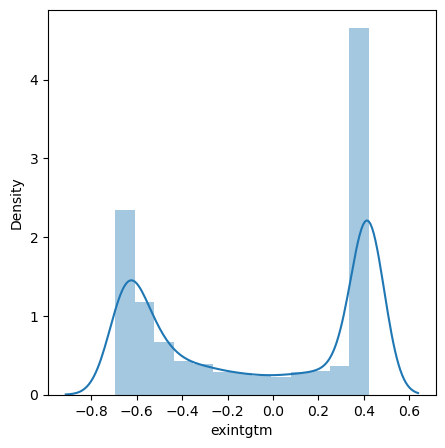

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


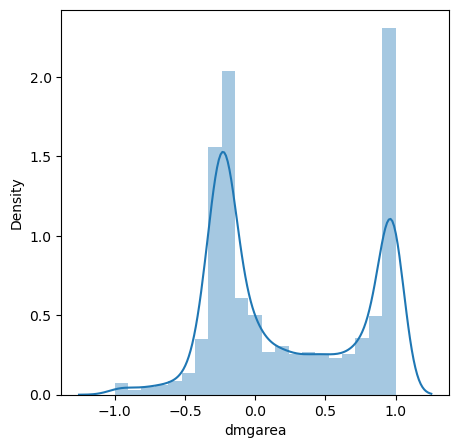

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


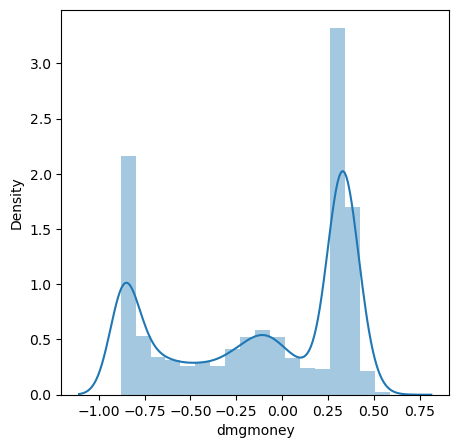

/home/jaezic/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


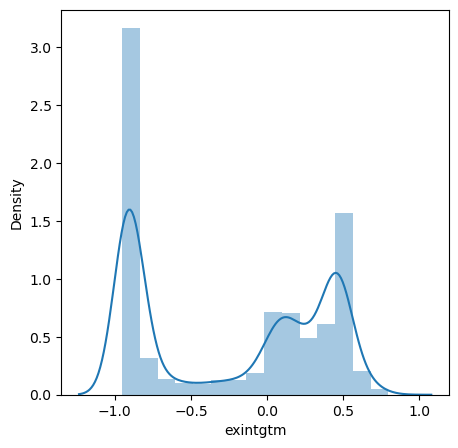

In [216]:
# dmgarea, dmgmoney, exintgtm -> normalize, and plot again
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

scaler = RobustScaler()
df[['dmgarea', 'dmgmoney', 'exintgtm']] = scaler.fit_transform(
    df[['dmgarea', 'dmgmoney', 'exintgtm']])
for col in ['dmgarea', 'dmgmoney', 'exintgtm']:
    plt.figure(figsize=(5, 5))
    sns.distplot(df[col])
    plt.show()

scaler = Normalizer()
df[['dmgarea', 'dmgmoney', 'exintgtm']] = scaler.fit_transform(
    df[['dmgarea', 'dmgmoney', 'exintgtm']])
for col in ['dmgarea', 'dmgmoney', 'exintgtm']:
    plt.figure(figsize=(5, 5))
    sns.distplot(df[col])
    plt.show()
    


In [210]:
# value that contains '입산자실화 ~~' convert to '입산자실화'
df['ocurcause'] = df['ocurcause'].apply(lambda x: x.replace('추정','') if '추정' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '담배' if '담뱃' in x or '담배' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '입산자실화' if '입산자' in x or '실화' in x or '발화' in x or '행위' in x or '훈련' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '소각' if '소각' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '방화' if '방화' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '미상' if '미상' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '화재' if '화재' in x else x)
df['ocurcause'] = df['ocurcause'].apply(lambda x: '불장난' if '장난' in x else x)
cnt = df['ocurcause'].value_counts()
df['ocurcause'] = df['ocurcause'].apply(lambda x: '기타' if cnt[x] < 37 else x)

In [211]:
# print unique values count in 'ocurcause'
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
pd.set_option('display.expand_frame_repr', True)
print(df['ocurcause'].value_counts())

입산자실화    5542
소각       2859
담배        813
기타        506
불장난       332
방화        187
화재        146
미상        129
낙뢰         44
Name: ocurcause, dtype: int64


In [212]:
# value counts of ocurcause lower than 5 is grouped into '기타'
df['ocurcause'] = df['ocurcause'].apply(lambda x: '기타' if df['ocurcause'].value_counts()[x] < 50 else x)

In [213]:
print(df['ocurcause'].unique())

['소각' '담배' '기타' '입산자실화' '미상' '화재' '방화' '불장난']
